<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-04-05 14:07:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... 
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  67.3MB/s    in 2.3s    

2025-04-05 14:07:37 (67.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Install librarie for SQLite queries</h3>

In [7]:
!pip install pandas sqlalchemy

In [8]:
import sqlite3

# connect to SQLite
conn = sqlite3.connect('survey-data.sqlite')

In [9]:
# Query to retrieve table names
query = "SELECT name FROM sqlite_master WHERE type='table';"

# Run query
tables = conn.execute(query).fetchall()

# Display result
for table in tables:
    print(table[0])

main


In [10]:
#test sql query
query = "SELECT * FROM main LIMIT 5"
df = pd.read_sql_query(query, conn)
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,None,None
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,None,None
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,None,None


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



In [11]:
#extract data and save as df
QUERY = """SELECT Age, JobSatPoints_6,JobSatPoints_7 FROM main """
df_jobsat_age = pd.read_sql_query(QUERY, conn)

In [12]:
#check for missing values
(df_jobsat_age.isnull().sum())

Age                   0
JobSatPoints_6    35987
JobSatPoints_7    35989
dtype: int64

In [13]:
#remove NaN
df_jobsat_age.dropna(subset=['JobSatPoints_6','JobSatPoints_7'],inplace=True)

In [14]:
#check for NaN removal
(df_jobsat_age.isnull().sum())

Age               0
JobSatPoints_6    0
JobSatPoints_7    0
dtype: int64

In [15]:
#group by age, aggregate Job satisfaction by calculating median
df_jobsat_med = df_jobsat_age.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

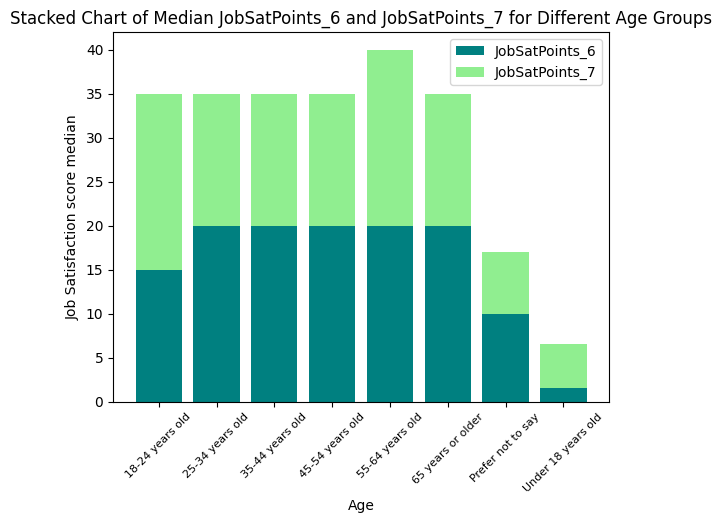

In [16]:
# bar plot stacked
plt.bar(df_jobsat_med.index, df_jobsat_med['JobSatPoints_6'], label="JobSatPoints_6", color='teal')
plt.bar(df_jobsat_med.index, df_jobsat_med['JobSatPoints_7'], bottom=df_jobsat_med['JobSatPoints_6'], label="JobSatPoints_7", color='lightgreen')

# labels and title
plt.xlabel('Age')
plt.ylabel('Job Satisfaction score median')
plt.title('Stacked Chart of Median JobSatPoints_6 and JobSatPoints_7 for Different Age Groups')
plt.xticks(rotation=45, fontsize=8)
plt.legend()

# Plot display
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


In [17]:
#extract data and save as df
QUERY = """SELECT Employment, JobSatPoints_6,JobSatPoints_7 FROM main"""
df_jobsat_employ =pd.read_sql_query(QUERY, conn)

In [18]:
#Simplify Employment categories
# Define function to create Employment Status
def simplify_employment(status):
    if pd.isna(status):  
        return 'Unknown'
    elif 'full-time' in status and 'Employed' in status:
        return 'Employed full-time'
    elif 'part-time' in status and 'Employed' in status:
        return 'Employed part-time'
    elif 'Student' in status:
        return 'Student'
    elif 'freelancer' in status or 'Independent contractor' in status or 'self-employed' in status:
        return 'Freelancer'
    elif 'Not employed' in status:
        return 'Unemployed'
    else:
        return 'Other'

# Apply function
df_jobsat_employ['Employment_status'] = df_jobsat_employ['Employment'].apply(simplify_employment)

# Check results
print(df_jobsat_employ['Employment_status'].head())

0    Employed full-time
1    Employed full-time
2    Employed full-time
3               Student
4               Student
Name: Employment_status, dtype: object


In [19]:
df_jobsat_employ.dropna(subset=['JobSatPoints_6','JobSatPoints_7'],inplace=True)

In [20]:
(df_jobsat_employ.isnull().sum())

Employment           0
JobSatPoints_6       0
JobSatPoints_7       0
Employment_status    0
dtype: int64

In [21]:
#group by employment status, aggregate Job satisfaction by calculating median
df_jobsat_employ_gr = df_jobsat_employ.groupby('Employment_status')[['JobSatPoints_6', 'JobSatPoints_7']].median()

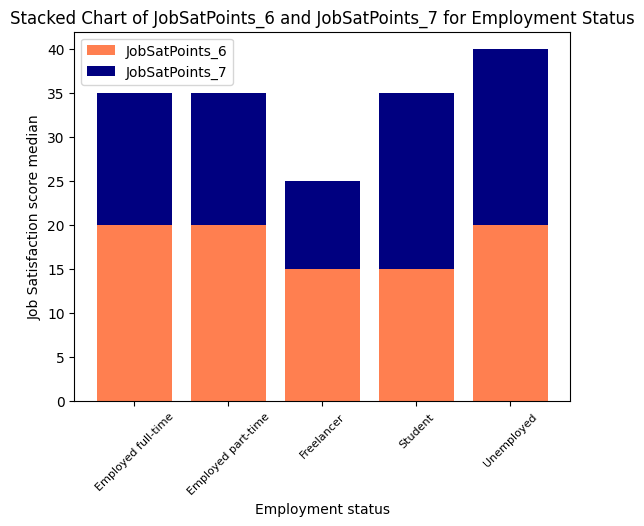

In [22]:
# bar plot stacked
plt.bar(df_jobsat_employ_gr.index, df_jobsat_employ_gr['JobSatPoints_6'], label="JobSatPoints_6", color='coral')
plt.bar(df_jobsat_employ_gr.index, df_jobsat_employ_gr['JobSatPoints_7'], bottom=df_jobsat_employ_gr['JobSatPoints_6'], label="JobSatPoints_7", color='navy')

plt.xlabel('Employment status')
plt.ylabel('Job Satisfaction score median')
plt.title('Stacked Chart of JobSatPoints_6 and JobSatPoints_7 for Employment Status')
plt.xticks(rotation=45, fontsize=8)
plt.legend()

plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


➡️*Not possible to specifically extract respondents aged between 30 and 35 since 'Age' is stored as categorical variable such 25-34 and 35-44 years old.*

In [24]:
#select data using SQLite and create a df
QUERY = """SELECT Age, ConvertedCompYearly,JobSatPoints_6 FROM main """ 
df_comp = pd.read_sql_query(QUERY,conn)

In [25]:
#outlier convertedCompYearly
Q3 = df_comp['ConvertedCompYearly'].quantile(0.75) 
Q1 = df_comp['ConvertedCompYearly'].quantile(0.25) 
IQR = Q3-Q1 
higher_outlier = Q3 + 1.5*IQR
higher_outlier

np.float64(220860.75)

In [26]:
#filter data - remove outliers
df_comp_filtered =df_comp[df_comp['ConvertedCompYearly']<higher_outlier]

In [27]:
#normalize ConvertedCompYearly
min_converted = df_comp_filtered['ConvertedCompYearly'].min()
max_converted = df_comp_filtered['ConvertedCompYearly'].max()
df_comp_filtered['ConvertedCompYearly']=(df_comp_filtered['ConvertedCompYearly']-min_converted)/(max_converted-min_converted)

/tmp/ipykernel_7231/3391346360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_filtered['ConvertedCompYearly']=(df_comp_filtered['ConvertedCompYearly']-min_converted)/(max_converted-min_converted)


In [28]:
#normalize JobSatPoints_6
min_job = df_comp_filtered['JobSatPoints_6'].min()
max_job = df_comp_filtered['JobSatPoints_6'].max()
df_comp_filtered['JobSatPoints_6']=(df_comp_filtered['JobSatPoints_6']-min_job)/(max_job-min_job)

/tmp/ipykernel_7231/2772609076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_filtered['JobSatPoints_6']=(df_comp_filtered['JobSatPoints_6']-min_job)/(max_job-min_job)


In [29]:
#check for missing values
(df_comp_filtered.isnull().sum())

Age                       0
ConvertedCompYearly       0
JobSatPoints_6         6910
dtype: int64

In [30]:
#check for normalization (mean should be <1)
(df_comp_filtered['ConvertedCompYearly'].mean())

np.float64(0.32399753820040617)

In [31]:
#check for normalization (mean should be <1)
df_comp_filtered['JobSatPoints_6'].mean()

np.float64(0.2527604039364508)

In [32]:
#remove NaN
df_comp_filtered.dropna(subset=['JobSatPoints_6'],inplace=True)

/tmp/ipykernel_7231/1928883867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_filtered.dropna(subset=['JobSatPoints_6'],inplace=True)


In [33]:
#check for NaN removal
(df_comp_filtered.isnull().sum())

Age                    0
ConvertedCompYearly    0
JobSatPoints_6         0
dtype: int64

In [34]:
#group by age, aggregate by median
df_comp_grouped = df_comp_filtered.groupby('Age')[['JobSatPoints_6', 'ConvertedCompYearly']].median()

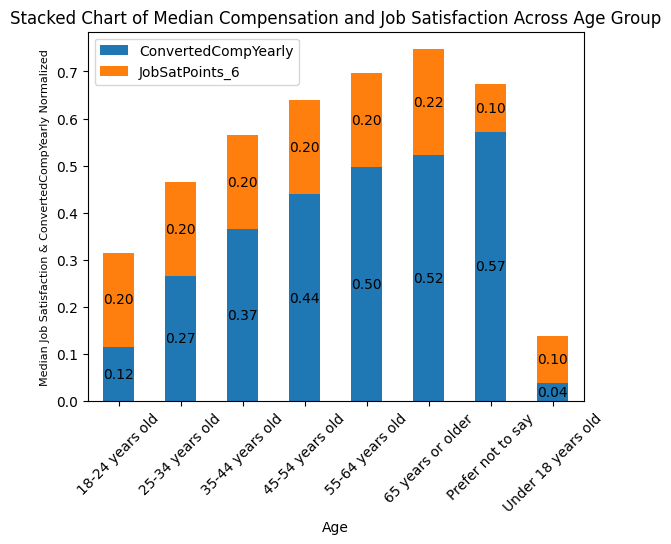

In [38]:
# bar stacked plot
ax = df_comp_grouped[['ConvertedCompYearly', 'JobSatPoints_6']].plot(kind='bar', stacked=True)

# Annotate values
for container in ax.containers:
    # add annotation for each bar
    ax.bar_label(container, fmt='%.2f', label_type='center')

#title and lables
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.ylabel('Median Job Satisfaction & ConvertedCompYearly Normalized', fontsize=8)
plt.title('Stacked Chart of Median Compensation and Job Satisfaction Across Age Group')

plt.legend()

#plot display
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


➡️*Retrieve the variable corresponding to the databases that respondents wish to learn*

In [39]:
# Check the variable of interest
cursor = conn.execute("PRAGMA table_info(main)")
columns = [row[1] for row in cursor.fetchall()]  # the column name is in the second position (index 1)

#filter column containing or start with 'Database'
matching_columns = [col for col in columns if 'Database' in col or col.startswith('Database')]

print(matching_columns)

['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired']


In [40]:
#SQL query to select data and create a df
QUERY = """ SELECT Age, DatabaseWantToWorkWith, ResponseId FROM main """ 
df_database = pd.read_sql_query(QUERY,conn)

In [41]:
df_database.head()

,Age,DatabaseWantToWorkWith,ResponseId
0,Under 18 years old,None,1
1,35-44 years old,PostgreSQL,2
2,45-54 years old,Firebase Realtime Database,3
3,18-24 years old,MongoDB;MySQL;PostgreSQL,4
4,18-24 years old,PostgreSQL;SQLite,5


In [42]:
#check for missing values
(df_database.isnull().sum())

Age                           0
DatabaseWantToWorkWith    22879
ResponseId                    0
dtype: int64

In [43]:
#split databases names within responses and create a list
df_database['DatabaseWantToWorkWith']=df_database['DatabaseWantToWorkWith'].str.split(';') 
df_database_exploded=df_database.explode('DatabaseWantToWorkWith')

In [44]:
#check for the database list
df_database_exploded['DatabaseWantToWorkWith'].head()

0                          None
1                    PostgreSQL
2    Firebase Realtime Database
3                       MongoDB
3                         MySQL
Name: DatabaseWantToWorkWith, dtype: object

In [45]:
#group by Age and order by Database occurrences
df_database_counts = df_database_exploded.groupby(['Age', 'DatabaseWantToWorkWith']).size().reset_index(name='Count')

In [46]:
#select top 5 databases for occurrence
top_5_databases = df_database_counts.groupby('Age').apply(
    lambda x: x.nlargest(5, 'Count')
).reset_index(drop=True)

/tmp/ipykernel_7231/2210947508.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_databases = df_database_counts.groupby('Age').apply(


In [47]:
#create a pivot table
df_pivot = top_5_databases.pivot(index='Age', columns='DatabaseWantToWorkWith', values='Count').fillna(0)

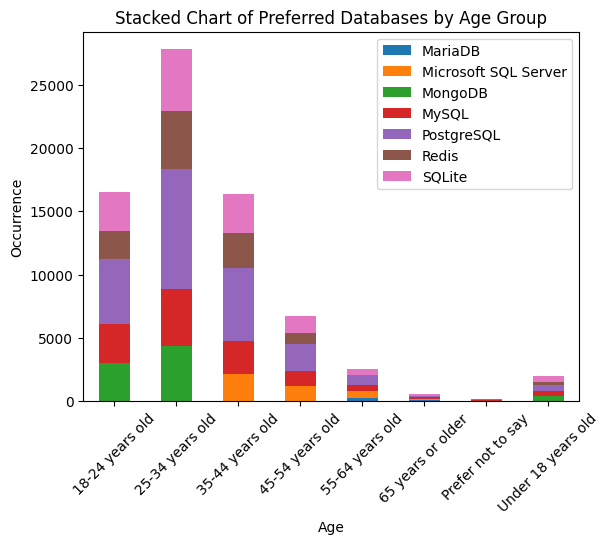

In [48]:
# stacked bar plot
ax = df_pivot.plot(kind='bar', stacked=True)

#label and title
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.ylabel('Occurrence')
plt.title('Stacked Chart of Preferred Databases by Age Group')

plt.legend()

# plot display
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


In [49]:
#select variables with SQL and convert to df
QUERY = """SELECT Employment, JobSat, ResponseId FROM main """ 
df_job = pd.read_sql_query(QUERY,conn)

In [50]:
#copied the function of Employment status to prevent from bug

def simplify_employment(status):
    if pd.isna(status):  # juste au cas ou mais il n'y a pas de NaN
        return 'Unknown'
    elif 'full-time' in status and 'Employed' in status:
        return 'Employed full-time'
    elif 'part-time' in status and 'Employed' in status:
        return 'Employed part-time'
    elif 'Student' in status:
        return 'Student'
    elif 'freelancer' in status or 'Independent contractor' in status or 'self-employed' in status:
        return 'Freelancer'
    elif 'Not employed' in status:
        return 'Unemployed'
    else:
        return 'Other'

# Apply function
df_job['Employment_status'] = df_job['Employment'].apply(simplify_employment)

In [51]:
#check for missing values
(df_job.isnull().sum())

Employment               0
JobSat               36311
ResponseId               0
Employment_status        0
dtype: int64

In [52]:
#remove NaN
df_job.dropna(subset='JobSat',inplace=True)

In [53]:
#check for removal
(df_job.isnull().sum())

Employment           0
JobSat               0
ResponseId           0
Employment_status    0
dtype: int64

In [54]:
#group by, count occurrence en convert to df
df_employment_counts = df_job.groupby(['JobSat', 'Employment_status']).size().reset_index(name='Count')

In [55]:
#convert to pivot table
df_pivot_job = df_employment_counts.pivot(index='JobSat', columns='Employment_status', values='Count').fillna(0)

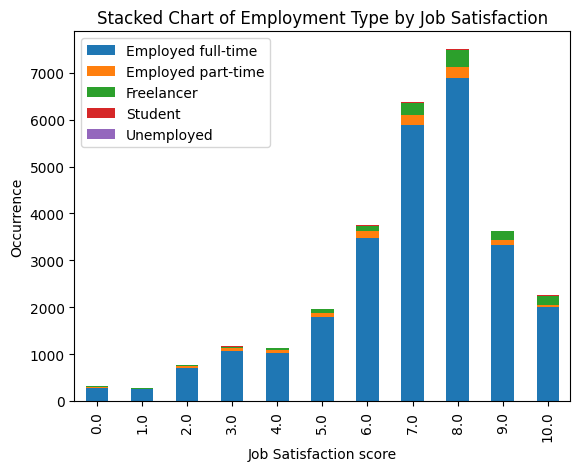

In [57]:
# stacked bar plot
ax = df_pivot_job.plot(kind='bar', stacked=True)

#Add lables and title
plt.xlabel('Job Satisfaction score')
plt.ylabel('Occurrence')
plt.title('Stacked Chart of Employment Type by Job Satisfaction')

plt.legend()

plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [58]:
#SQL query for variable and convert into df
QUERY = """ SELECT Age, LanguageAdmired, ResponseId FROM main """ 
df_lang = pd.read_sql_query(QUERY,conn)

In [59]:
#split language and retrieve a list
df_lang['LanguageAdmired'] = df_lang['LanguageAdmired'].str.split(';') 
df_lang_exploded = df_lang.explode('LanguageAdmired') 

In [60]:
#group by, count occurrency for Language and convert to df
df_lang_counts = df_lang_exploded.groupby(['Age', 'LanguageAdmired']).size().reset_index(name='Count')

In [61]:
#Top 5 language
top_5_lang = df_lang_counts.groupby('Age').apply(
    lambda x: x.nlargest(5, 'Count')
).reset_index(drop=True)

/tmp/ipykernel_7231/640243900.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_lang = df_lang_counts.groupby('Age').apply(


In [62]:
#convert to pivot table
df_pivot_lang = top_5_lang.pivot(index='Age', columns='LanguageAdmired', values='Count').fillna(0)

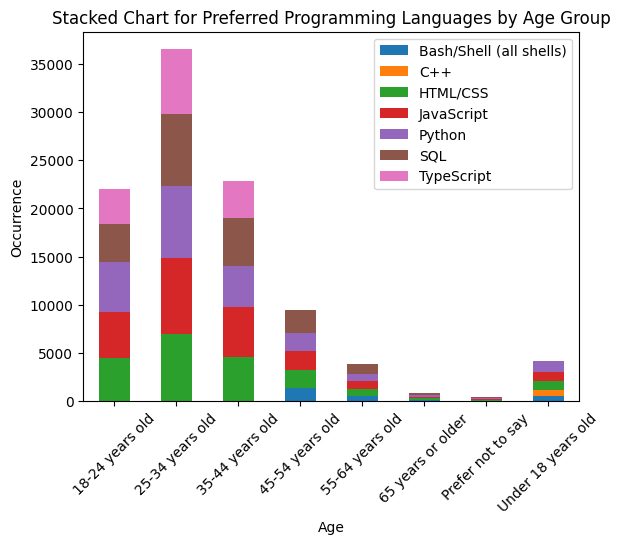

In [63]:
# stacked bar plot
ax = df_pivot_lang.plot(kind='bar', stacked=True)

#lables and title
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.ylabel('Occurrence')
plt.title('Stacked Chart for Preferred Programming Languages by Age Group')

plt.legend()

plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [64]:
#SQL query to select data and convert as df
QUERY = """ SELECT Employment, PlatformAdmired, ResponseID FROM main """ 
df_plateform = pd.read_sql_query(QUERY,conn)

In [65]:
# Apply function to convert Employment to Employment status
df_plateform['Employment_status'] = df_plateform['Employment'].apply(simplify_employment)

In [66]:
#split Plateform as single Plateform and store as a list
df_plateform['PlatformAdmired']=df_plateform['PlatformAdmired'].str.split(';')
df_plateform_exploded = df_plateform.explode('PlatformAdmired')

In [67]:
#check for individual occurrency of plateform
df_plateform_exploded['PlatformAdmired'].head()

0                         None
1    Amazon Web Services (AWS)
1                       Heroku
1                      Netlify
2                 Google Cloud
Name: PlatformAdmired, dtype: object

In [68]:
#group by, count occurrency and convert as df
df_plateform_counts = df_plateform_exploded.groupby(['Employment_status', 'PlatformAdmired']).size().reset_index(name='Count')


In [69]:
#top 5 plateform
top_5_plateform = df_plateform_counts.groupby('Employment_status').apply(
    lambda x: x.nlargest(5, 'Count')
).reset_index(drop=True)

/tmp/ipykernel_7231/3790341007.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_plateform = df_plateform_counts.groupby('Employment_status').apply(


In [70]:
#convert as pivot table
df_pivot_plateform = top_5_plateform.pivot(index='Employment_status', columns='PlatformAdmired', values='Count').fillna(0)

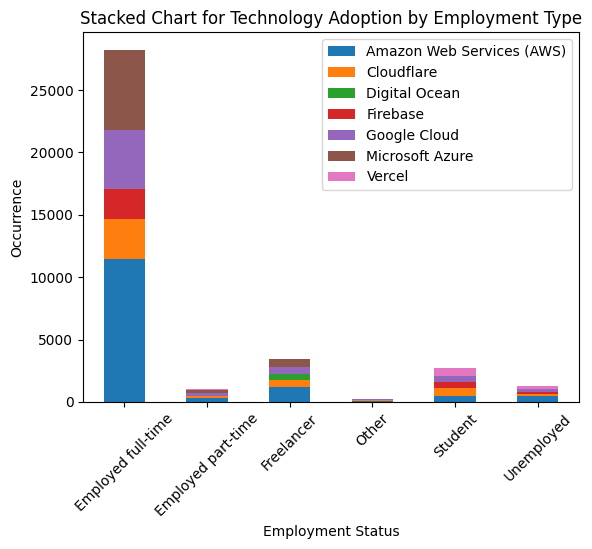

In [71]:
#stacked bar plot
ax = df_pivot_plateform.plot(kind='bar', stacked=True)

plt.xlabel('Employment Status')
plt.xticks(rotation=45)
plt.ylabel('Occurrence')
plt.title('Stacked Chart for Technology Adoption by Employment Type')

plt.legend()

plt.show()

In [72]:
#close the connection to SQLite
conn.close()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
